# Credit Card Customer Segmentation using K-Means

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
def load_data(filepath):
    if file_path[-3:] == 'csv':
        return pd.read_csv(file_path)
    elif file_path[-3:] == 'txt':
        return pd.read_csv(file_path, delimiter='\t')
    elif file_path[-4:] == 'json':
        return pd.read_json(file_path)
    elif file_path[-4:] == 'xlsx':
        return pd.read_excel(file_path)
    else:
        print("An error occured, use ['csv', 'xlsx', 'txt', 'json'] files only")

In [3]:
file_path = r"C:\Users\Atharva\Desktop\rxib\ML_Projects\Credit_Card_Customer_Segmentation_KMeans\BankChurners.xlsx"
data = load_data(file_path)
data.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [4]:
def drop_cols(df, cols_to_remove):
    df.drop(cols_to_remove, axis=1, inplace=True)

In [5]:
drop_cols(data, ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                 'CLIENTNUM','Attrition_Flag'])

### View Data

In [6]:
def view_data(df):
    print("First 5 rows of the data:")
    display(df.head())
    
    print("Shape of the data:")
    display(df.shape)
    
    print("Statistical description of the data")
    display(df.describe())
    
    print("Information of the data")
    display(df.info())
    
    print("Null Values in the data")
    display(df.isna().sum())

In [7]:
view_data(data)

First 5 rows of the data:


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Shape of the data:


(10127, 19)

Statistical description of the data


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Information of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-n

None

Null Values in the data


Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Visualizations

In [8]:
def group_cols_by_dtype(df):
    num_cols, cat_cols, dt_cols, bool_cols = [], [], [], []
    
    num_cols.append(df.select_dtypes(include=['int', 'float']).columns.to_list())
    cat_cols.append(df.select_dtypes(include=['object', 'category']).columns.to_list())
    dt_cols.append(df.select_dtypes(include=['datetime']).columns.to_list())
    bool_cols.append(df.select_dtypes(include=['bool']).columns.to_list())
    
    return num_cols, cat_cols, dt_cols, bool_cols

In [9]:
num_cols, cat_cols, dt_cols, bool_cols = group_cols_by_dtype(data)

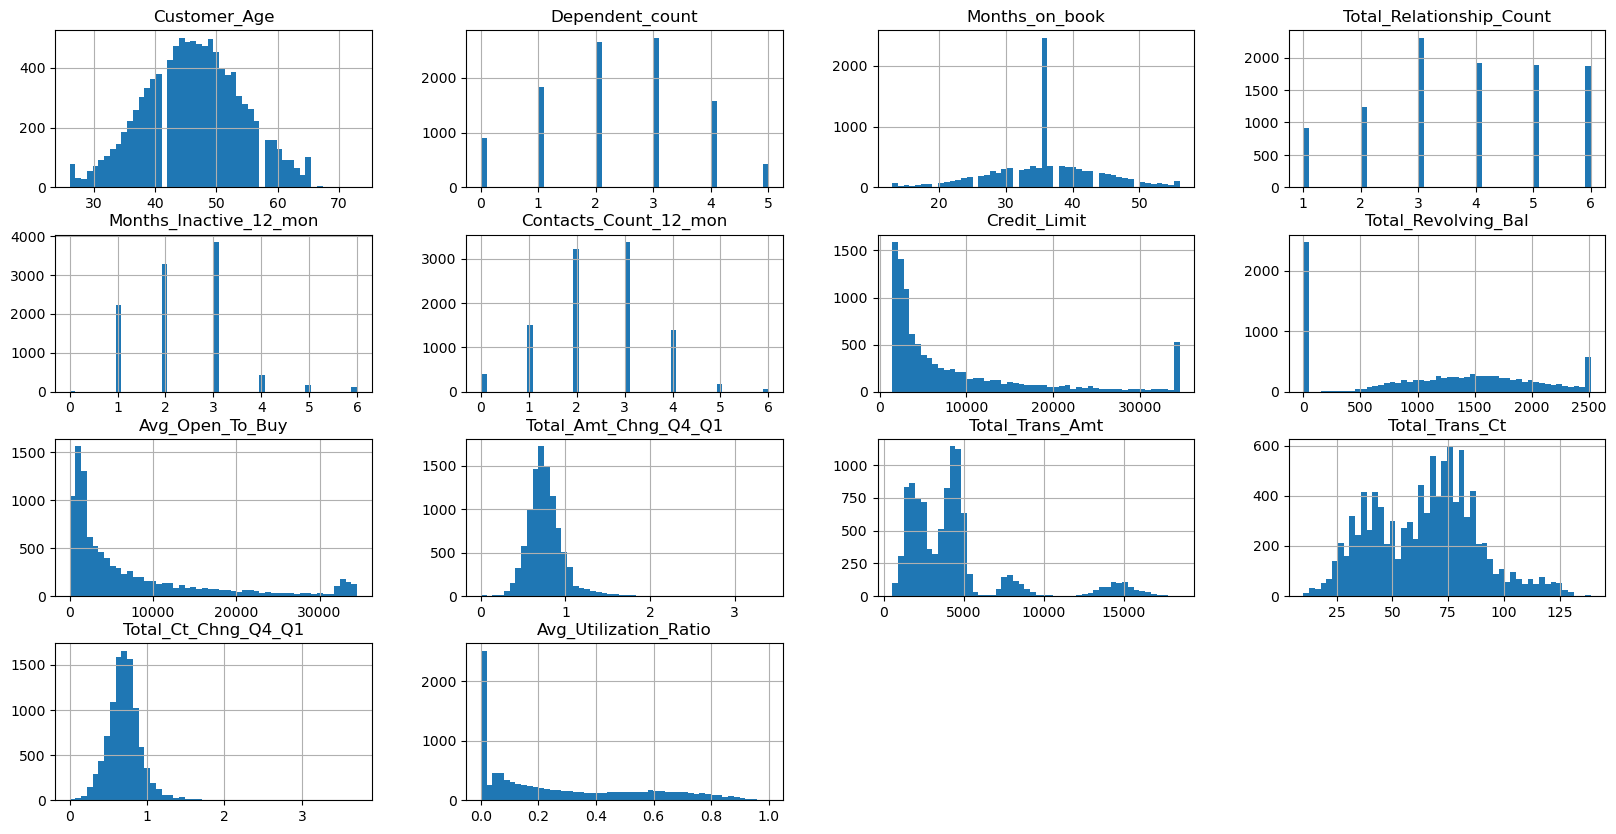

In [10]:
data[num_cols[0]].hist(figsize=(20,10), bins = 50);

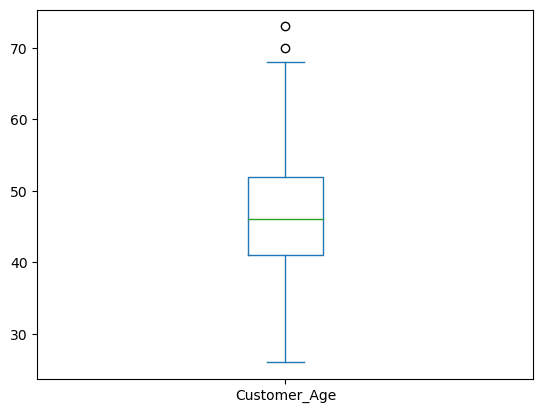

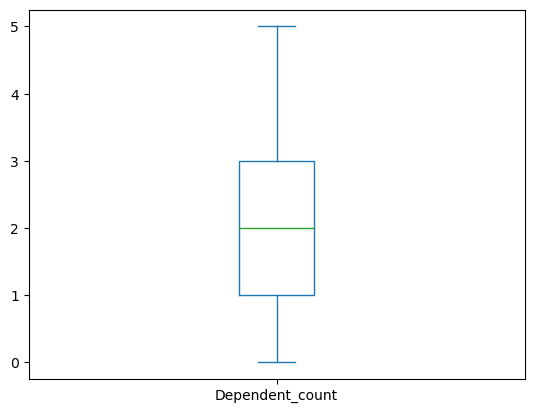

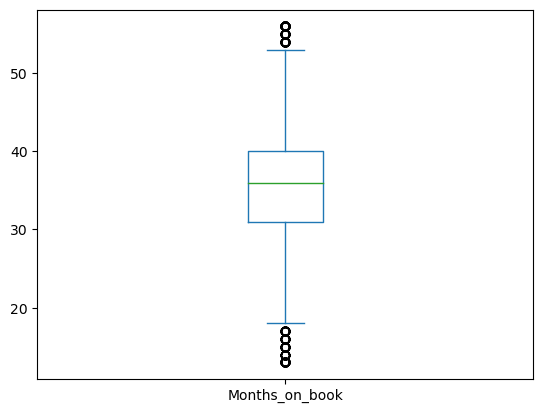

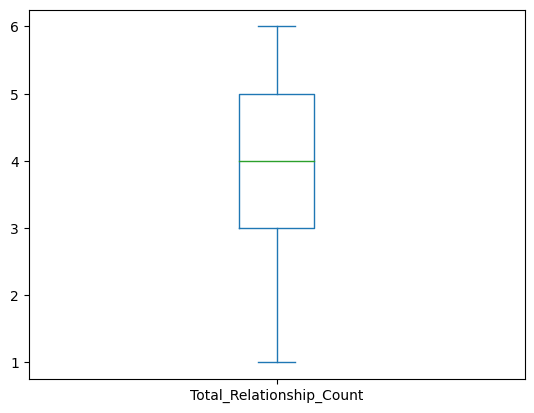

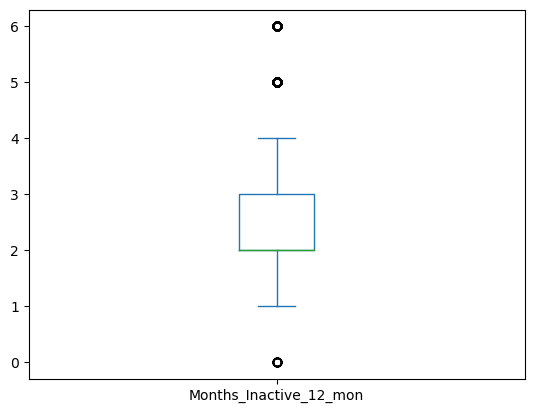

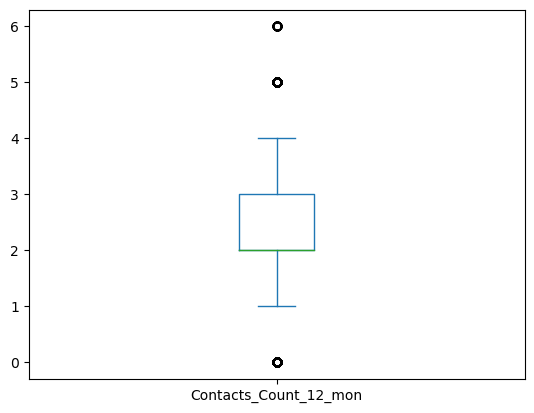

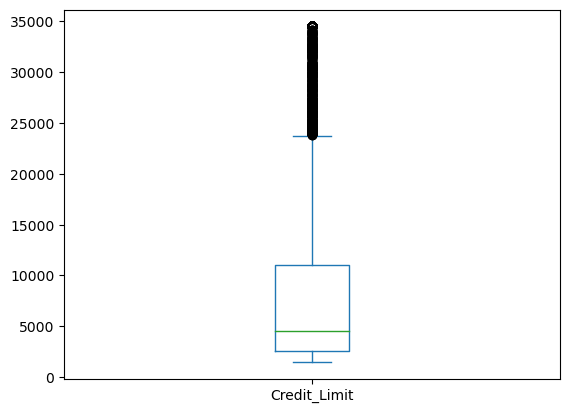

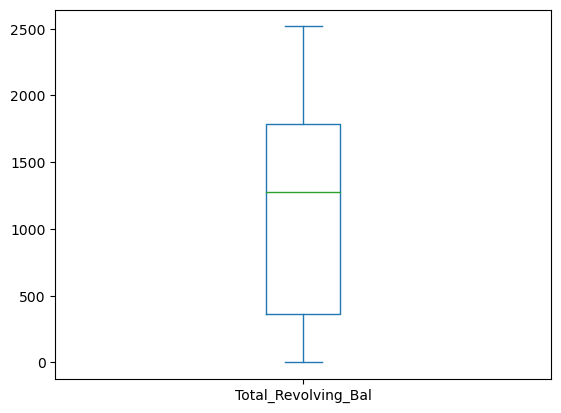

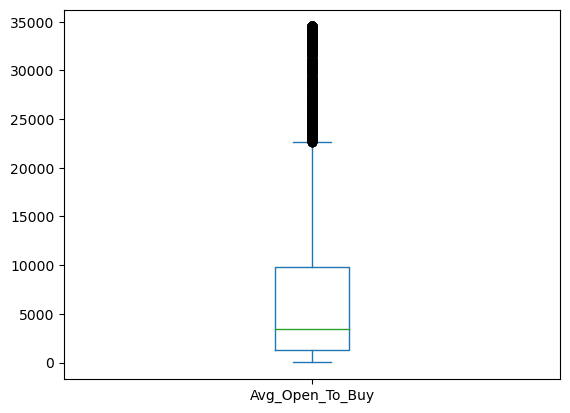

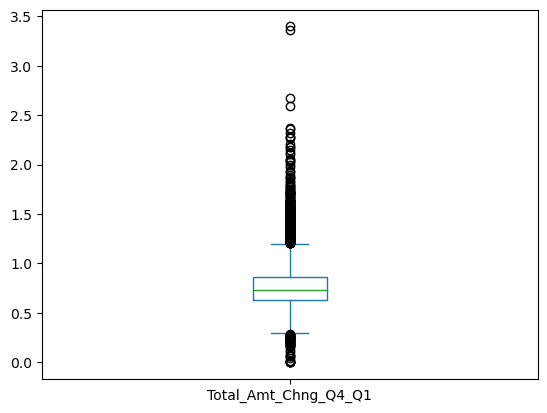

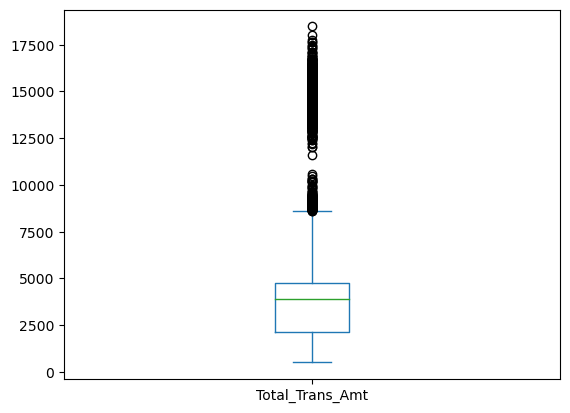

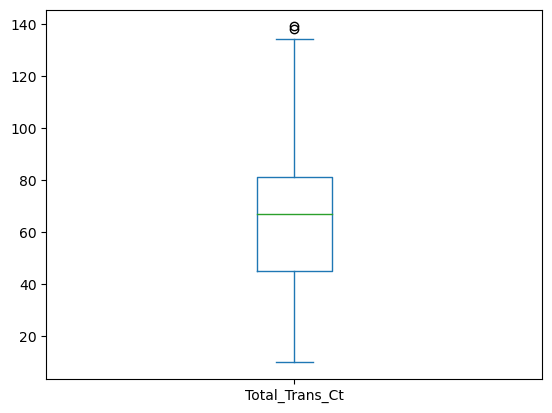

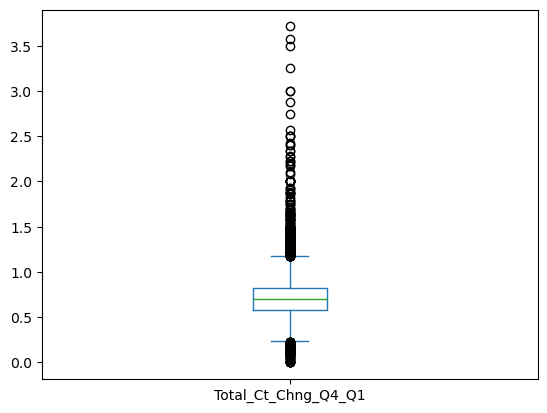

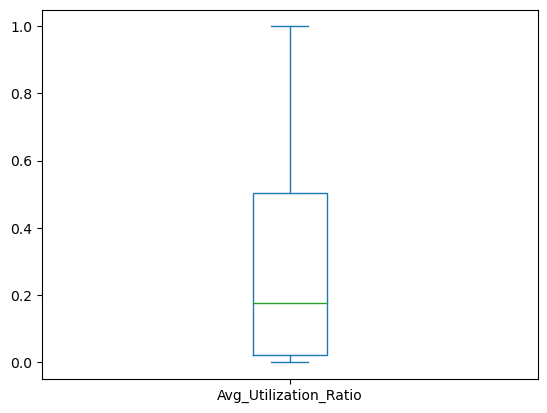

In [11]:
for col in num_cols[0]:
    data[col].plot(kind = 'box')
    plt.show()

In [12]:
for col in cat_cols[0]:
    print('Value Counts for:', col)
    display(pd.DataFrame(data[col].value_counts()))

Value Counts for: Gender


,count
Gender,
F,5358
M,4769


Value Counts for: Education_Level


,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


Value Counts for: Marital_Status


,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748


Value Counts for: Income_Category


,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


Value Counts for: Card_Category


,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


Bar Plot for Categorical Columns in the Data


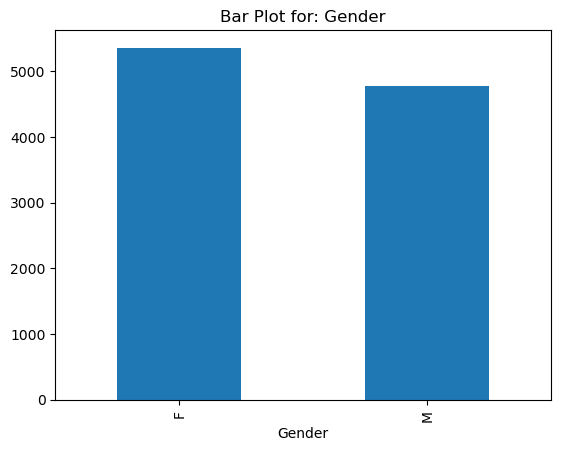

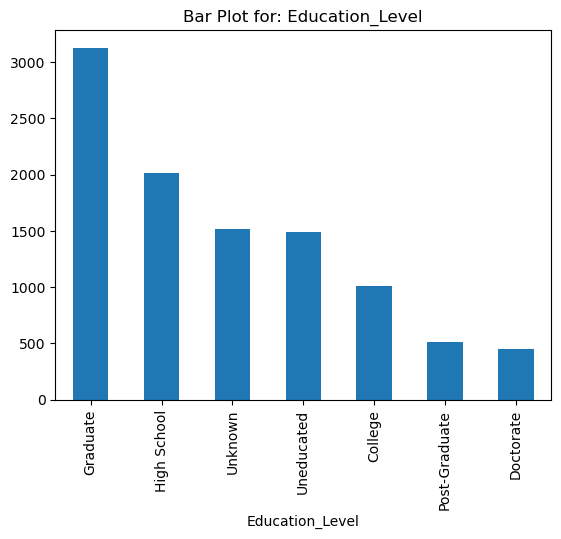

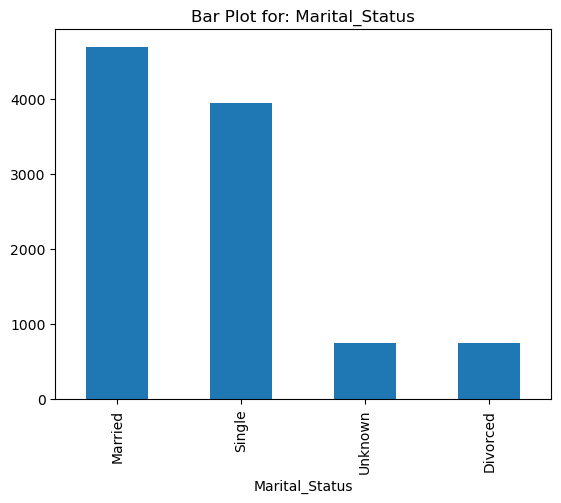

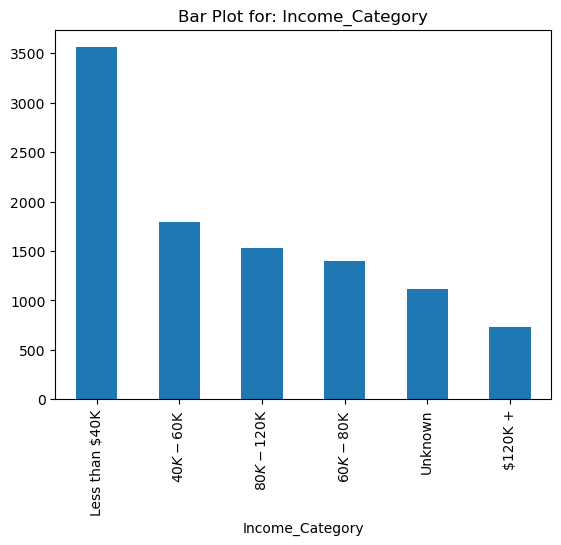

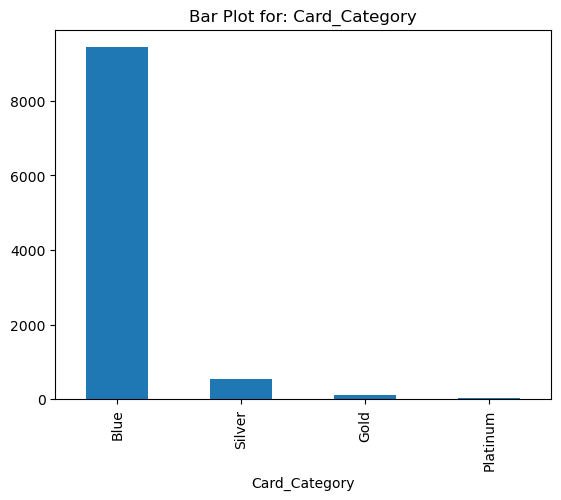

In [13]:
print("Bar Plot for Categorical Columns in the Data")

for col in cat_cols[0]:
    data[col].value_counts().plot(kind = 'bar');
    plt.title("Bar Plot for: " + col);
    plt.show();

### Feature Engineering

In [14]:
data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=[25,40,50,60,100],
                                   labels=['25 to 40', '40 to 50', '50 to 60', '60+'])

In [16]:
# lower_limit, upper_limit = [], []
# for i in data['Income_Category']:
#     lower_limit.append(i.split(' ')[0])
#     upper_limit.append(i.split(' ')[-1])
    
# data['lower_limit'] = lower_limit
# data['upper_limit'] = upper_limit

# data['lower_limit'] = data['lower_limit'].str.replace("$","")
# data['lower_limit'] = data['lower_limit'].str.replace("K","")
# data['lower_limit'] = np.where(data['lower_limit'] == 'Less', 40, data['lower_limit'])
# data['lower_limit'] = np.where(data['lower_limit'] == 'Unknown', np.nan, data['lower_limit'])
# data['lower_limit'] = data['lower_limit'].astype('float')

# data['upper_limit'] = data['upper_limit'].str.replace("$","")
# data['upper_limit'] = data['upper_limit'].str.replace("K","")
# data['upper_limit'] = np.where(data['upper_limit'] == '+', 120, data['upper_limit'])
# data['upper_limit'] = np.where(data['upper_limit'] == 'Unknown', np.nan, data['upper_limit'])
# data['upper_limit'] = data['upper_limit'].astype('float')

# data['Income'] = (data['lower_limit'] + data['upper_limit'])/2
# data['Income'] = data['Income'].astype('float')
# data.drop(['lower_limit','upper_limit'], axis =1 , inplace=True)

# data['Income'] =data['Income']*1000

In [17]:
data.dropna(inplace=True)
data.shape

(10127, 20)

### Customer Activity

In [18]:
data['Months_Active_12_mon'] = 12 - data['Months_Inactive_12_mon']

In [19]:
data['Contacts_per_Month'] = data['Contacts_Count_12_mon'] / data['Months_Active_12_mon']

### Financial Behavior Features

In [20]:
data['revolving_balance_by_credit_limit'] = data['Total_Revolving_Bal'] / data['Credit_Limit']

In [21]:
data['Spending_Ratio'] = data['Total_Trans_Amt'] / data['Credit_Limit']

### Card Usage Behaviour

In [22]:
data['card_usage_count_per_month'] = data['Total_Trans_Ct'] / data['Months_on_book']

In [23]:
data['card_usage_amount_per_month'] = data['Total_Trans_Amt'] / data['Months_on_book']

In [24]:
data['Remaining_Credit'] = data['Credit_Limit'] - data['Total_Revolving_Bal']

### Age based features

In [25]:
data['Dependents_by_Age'] = (data['Dependent_count']+1 )/ data['Customer_Age']

In [26]:
# data['Income_by_Age'] = data['Income'] / data['Customer_Age']

In [27]:
data['Customer_Usage%_of_Age'] = (data['Months_on_book']/12) / data['Customer_Age']

### Income Based Features

In [28]:
# data['Income_per_Dependent'] = data['Income'] / (data['Dependent_count']+1)

In [29]:
# data['Credit_Limit_%_of_Income'] = data['Credit_Limit'] / data['Income']

In [30]:
# data['Reveloving_Balance%_of_Income'] = data['Total_Revolving_Bal'] / data['Income']

In [31]:
# data['Avail_Credit%_of_Income'] = data['Avg_Open_To_Buy'] / data['Income']

### Relationship Features

In [32]:
data['Relationship_Per_Year'] = data['Total_Relationship_Count'] / (data['Months_on_book']*12)

In [33]:
data['Credit_per_Relationship'] = data['Credit_Limit'] / data['Total_Relationship_Count']

In [34]:
data['Balance_per_Relationship'] = data['Total_Revolving_Bal'] / data['Total_Relationship_Count']

In [35]:
data['Trans_Amt_per_Relationship'] = data['Total_Trans_Amt'] / data['Total_Relationship_Count']

In [36]:
data['Trans_Count_per_Relationship'] = data['Total_Trans_Ct'] / data['Total_Relationship_Count']

### Transaction Amount Features

In [37]:
# Transaction intensity: average transaction amount per transaction
data['Transaction_Intensity'] = data['Total_Trans_Amt'] / data['Total_Trans_Ct']

In [38]:
# Transaction proportion: total transaction amount as a fraction of credit limit
data['Transaction_Proportion'] = data['Total_Trans_Amt'] / data['Credit_Limit']

In [39]:
# Transaction per month
data['Transaction_Per_Month'] = data['Total_Trans_Amt'] / data['Months_on_book']

### Transaction Count Features

In [40]:
# Average transactions per month on book
data['Avg_Trans_Per_Month'] = data['Total_Trans_Ct'] / data['Months_on_book']

### Plot New Features Distribution

In [41]:
new_features = [
    # Contacts Features
    'Contacts_per_Month',
    'Months_Active_12_mon',
    
    # Financial Behavior Features
    'revolving_balance_by_credit_limit',
    'Spending_Ratio',
#     'Income',
    
    # Card Usage Behaviour
    'card_usage_count_per_month',
    'card_usage_amount_per_month',
    'Remaining_Credit',
    
    # Age-based Features
    'Dependents_by_Age',
#     'Income_by_Age',
    'Customer_Usage%_of_Age',
    
    # Income-Based Features
#     'Income_per_Dependent',
#     'Credit_Limit_%_of_Income',
#     'Reveloving_Balance%_of_Income',
#     'Avail_Credit%_of_Income',
    
    # Relationship Features
    'Relationship_Per_Year',
    'Credit_per_Relationship',
    'Balance_per_Relationship',
    'Trans_Amt_per_Relationship',
    'Trans_Count_per_Relationship',
    
    # Transaction Amount Features
    'Transaction_Intensity',
    'Transaction_Proportion',
    'Transaction_Per_Month',
    
    # Transaction Count Features
    'Avg_Trans_Per_Month'
]

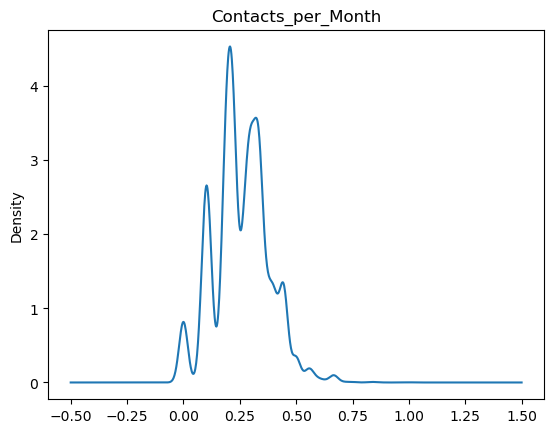

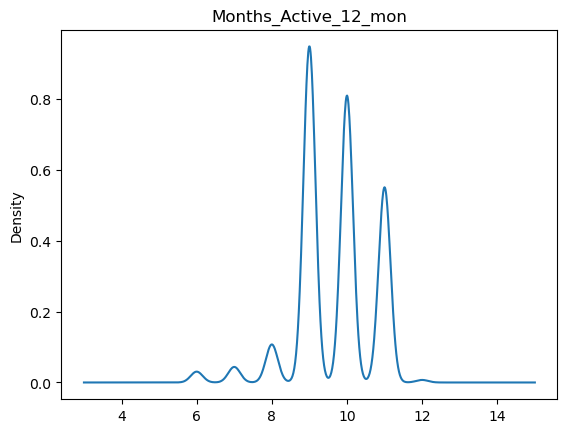

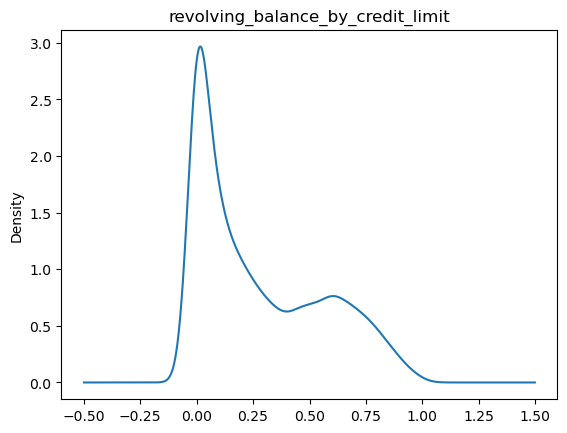

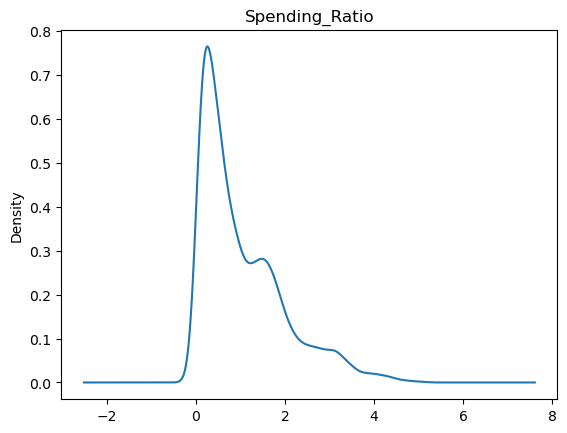

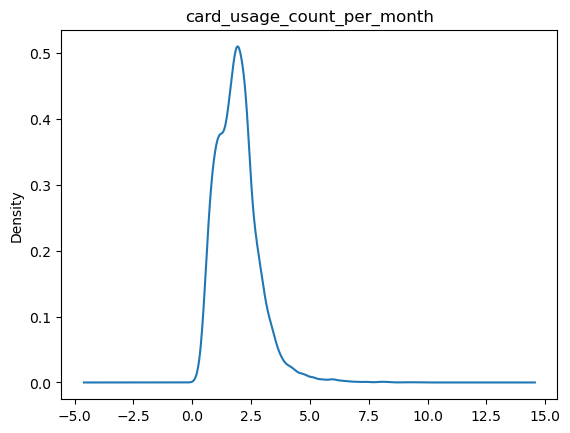

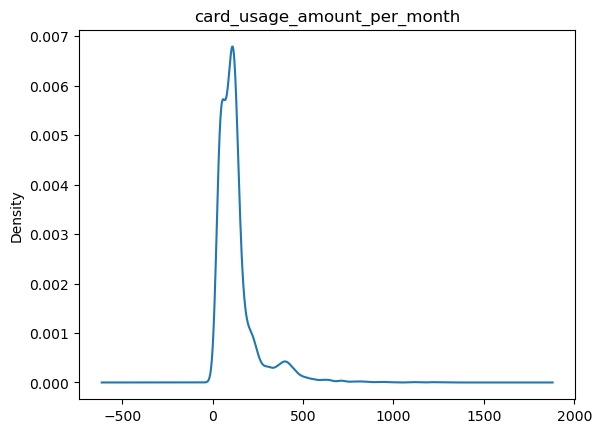

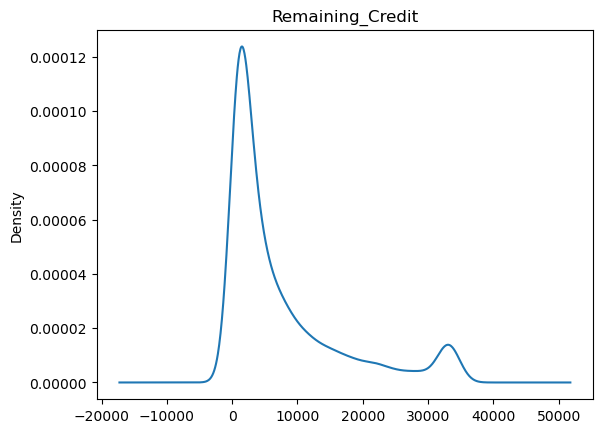

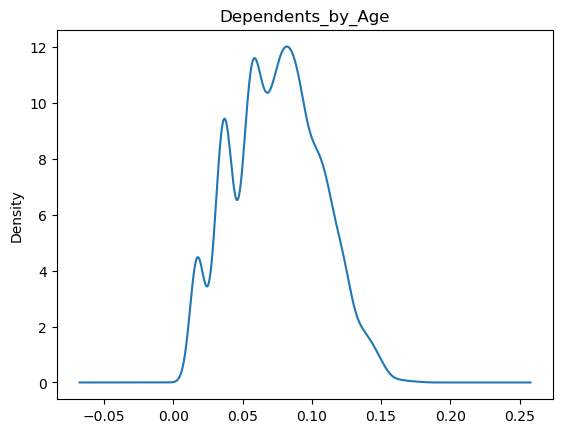

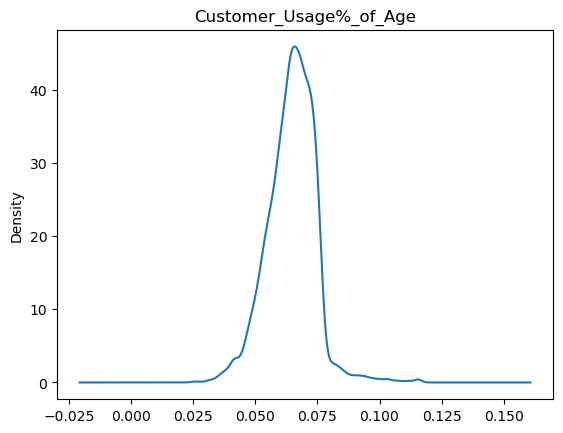

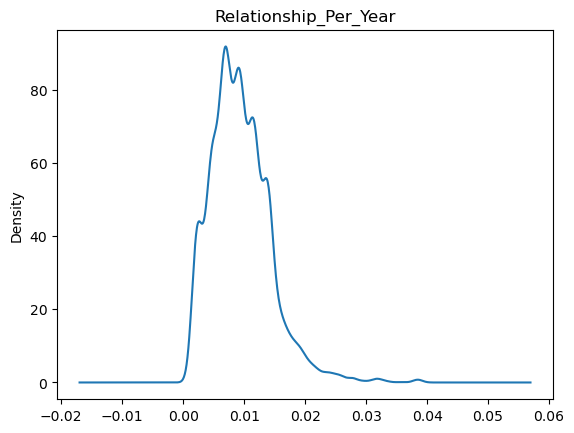

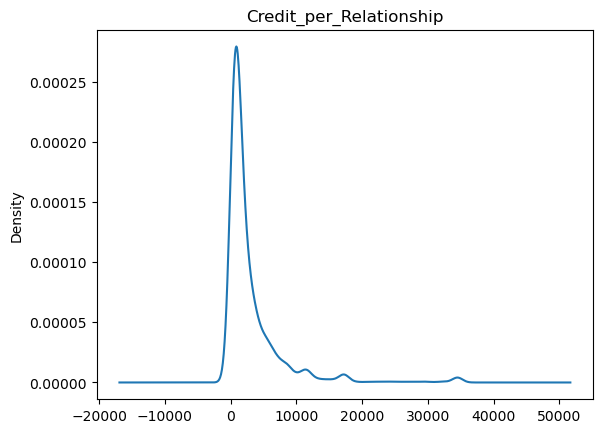

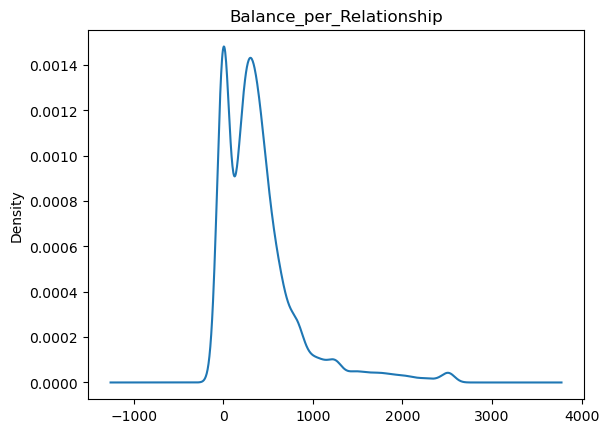

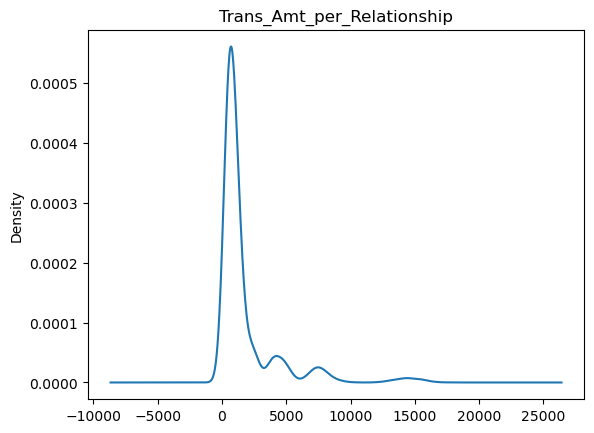

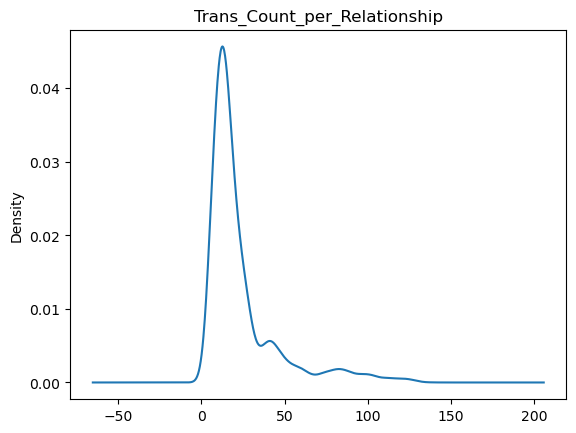

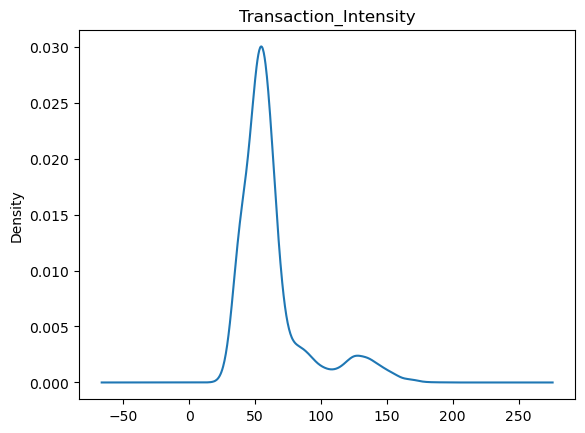

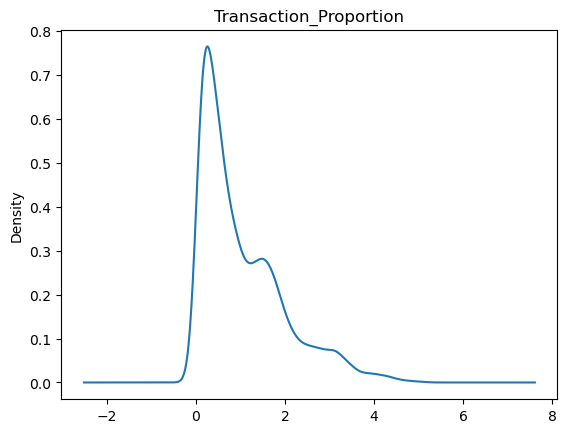

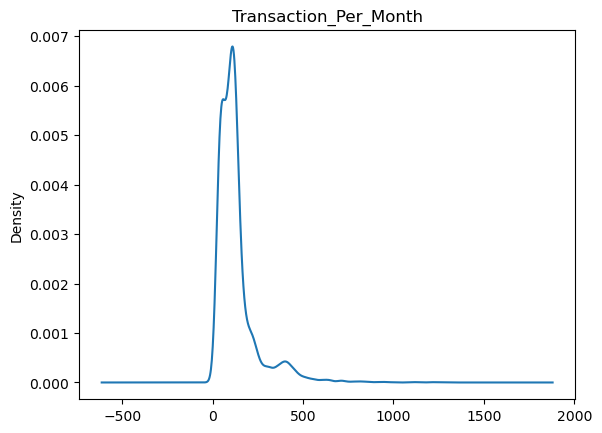

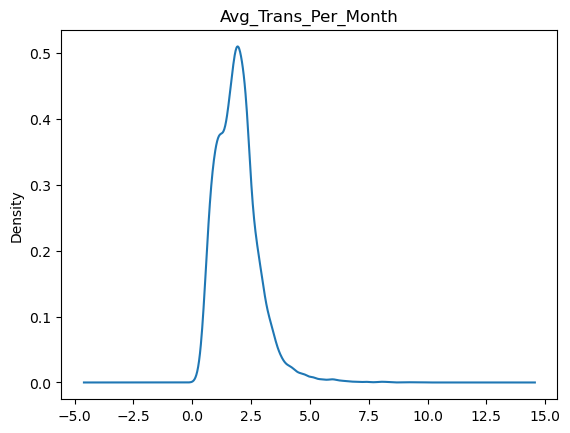

In [42]:
for col in new_features:
    data[col].plot(kind = 'density');
    plt.title(col)
    plt.show()

In [43]:
# all_num_cols = new_features + num_cols[0]

In [44]:
cols_to_keep = ['Customer_Age_bins','Gender',
                'Education_Level','Marital_Status',
                'Income_Category',
                'revolving_balance_by_credit_limit',
                'Spending_Ratio',
                'Remaining_Credit'
               ]
data = data[cols_to_keep]

In [45]:
cols_to_keep[-3:]

['revolving_balance_by_credit_limit', 'Spending_Ratio', 'Remaining_Credit']

In [46]:
scaler = MinMaxScaler()
data[cols_to_keep[-3:]] = scaler.fit_transform(data[cols_to_keep[-3:]])

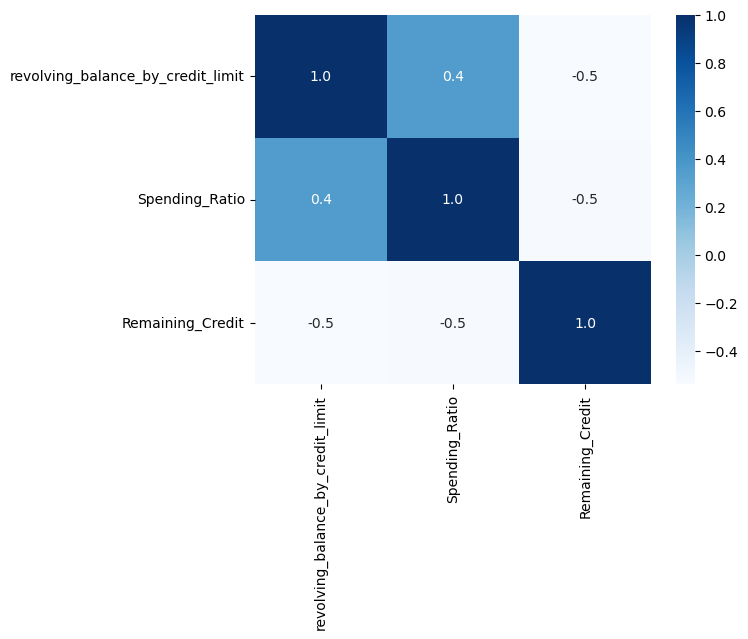

In [47]:
# plt.figure(figsize=(20,15));
sns.heatmap(data[cols_to_keep[-3:]].corr(), cmap='Blues', annot=True, fmt='.1f');

In [48]:
corr_matrix = data[cols_to_keep[-3:]].corr().abs()

upper_triangle = np.triu(np.ones(corr_matrix.shape), k =1).astype('bool')
upper_triangle_df = corr_matrix.where(upper_triangle)

In [49]:
high_corr = [col for col in upper_triangle_df.columns if any(upper_triangle_df[col] > 0.6)]

In [50]:
len(high_corr)

0

In [51]:
high_corr

[]

In [52]:
filtered_data = data.drop(high_corr, axis=1)
filtered_data.head()

,Customer_Age_bins,Gender,Education_Level,Marital_Status,Income_Category,revolving_balance_by_credit_limit,Spending_Ratio,Remaining_Credit
0,40 to 50,M,High School,Married,$60K - $80K,0.061300,0.014231,0.345116
1,40 to 50,F,Graduate,Single,Less than $40K,0.104780,0.027314,0.214093
2,50 to 60,M,Graduate,Married,$80K - $120K,0.000000,0.105484,0.098948
3,25 to 40,F,High School,Unknown,Less than $40K,0.760672,0.066247,0.022977
4,25 to 40,M,Uneducated,Married,$60K - $80K,0.000000,0.030604,0.136557


In [53]:
filtered_num_data = filtered_data[['revolving_balance_by_credit_limit','Spending_Ratio','Remaining_Credit']]
filtered_num_data.head()

,revolving_balance_by_credit_limit,Spending_Ratio,Remaining_Credit
0,0.061300,0.014231,0.345116
1,0.104780,0.027314,0.214093
2,0.000000,0.105484,0.098948
3,0.760672,0.066247,0.022977
4,0.000000,0.030604,0.136557


## KMeans Clustering

In [54]:
from sklearn.cluster import KMeans

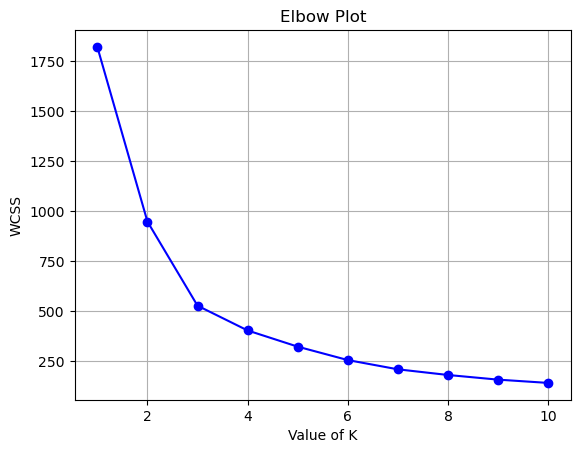

In [55]:
wcss = []

k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filtered_num_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(k_range, wcss, marker = 'o', color= 'blue');
plt.grid();
plt.title("Elbow Plot");
plt.xlabel("Value of K");
plt.ylabel("WCSS");

In [77]:
kmeans_model = KMeans(n_clusters=3, random_state=42, init='k-means++')
kmeans_model.fit(filtered_num_data)

KMeans(n_clusters=3, random_state=42)

In [78]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

#Silhouette Score
sil_score = silhouette_score(filtered_num_data, kmeans_model.labels_)
print(f"Silhouette Score: {sil_score:.4f}")

# Calculate DBI
dbi = davies_bouldin_score(filtered_num_data, kmeans_model.labels_)
print("Davies-Bouldin Index:", dbi)

Silhouette Score: 0.4740
Davies-Bouldin Index: 0.7409963785964749


In [79]:
filtered_data['Cluster_Label'] = kmeans_model.labels_
filtered_data['Cluster_Label'].value_counts()

Cluster_Label
1    5039
0    3427
2    1661
Name: count, dtype: int64

### Heirarchical Clustering

In [59]:
from sklearn.cluster import AgglomerativeClustering

In [60]:
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(filtered_num_data)


# 3.1 Silhouette Score
sil_score = silhouette_score(filtered_num_data, agg_labels)
print(f"Silhouette Score: {sil_score:.4f}")


# 3.3 Davies-Bouldin Index (DBI)
dbi_score = davies_bouldin_score(filtered_num_data, agg_labels)
print(f"Davies-Bouldin Index (DBI): {dbi_score:.4f}")

Silhouette Score: 0.4142
Davies-Bouldin Index (DBI): 0.7309


In [61]:
filtered_data['Agg_Labels'] = agg_labels
filtered_data['Agg_Labels'].value_counts()

Agg_Labels
0    6353
1    2390
2    1384
Name: count, dtype: int64

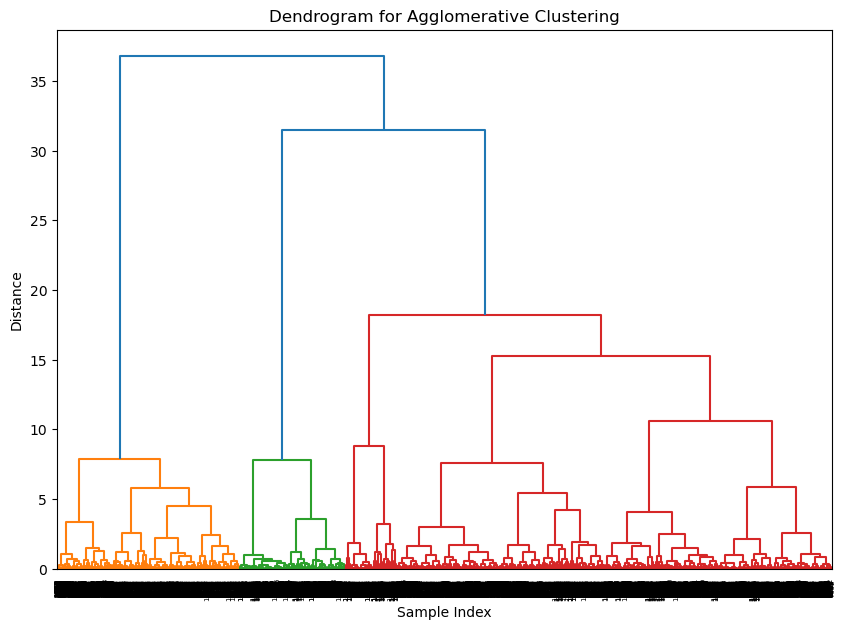

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(filtered_num_data, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [63]:
filtered_data.head()

,Customer_Age_bins,Gender,Education_Level,Marital_Status,Income_Category,revolving_balance_by_credit_limit,Spending_Ratio,Remaining_Credit,Cluster_Label,Agg_Labels
0,40 to 50,M,High School,Married,$60K - $80K,0.061300,0.014231,0.345116,1,0
1,40 to 50,F,Graduate,Single,Less than $40K,0.104780,0.027314,0.214093,1,0
2,50 to 60,M,Graduate,Married,$80K - $120K,0.000000,0.105484,0.098948,1,0
3,25 to 40,F,High School,Unknown,Less than $40K,0.760672,0.066247,0.022977,0,1
4,25 to 40,M,Uneducated,Married,$60K - $80K,0.000000,0.030604,0.136557,1,0


In [64]:
def dist_by_clusters(data, col):
    print('Distribution of ' + col + ' w.r.t different clusters')
    filtered_data[filtered_data['Cluster_Label']==0][col].plot(kind = 'density');
    filtered_data[filtered_data['Cluster_Label']==1][col].plot(kind = 'density');
    filtered_data[filtered_data['Cluster_Label']==2][col].plot(kind = 'density');
    
    plt.legend([0,1,2]);
    plt.show();

Distribution of revolving_balance_by_credit_limit w.r.t different clusters


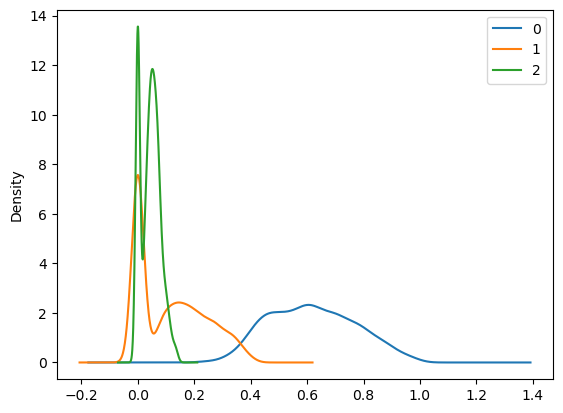

Distribution of Spending_Ratio w.r.t different clusters


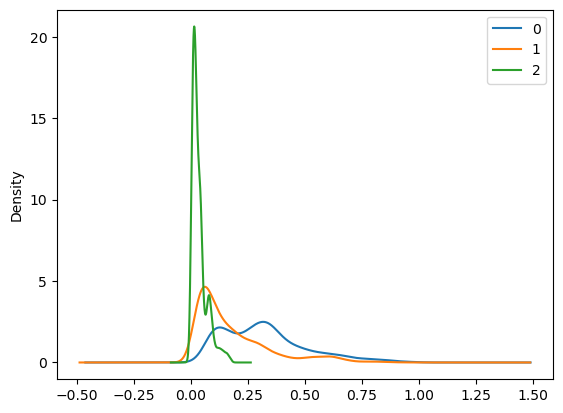

Distribution of Remaining_Credit w.r.t different clusters


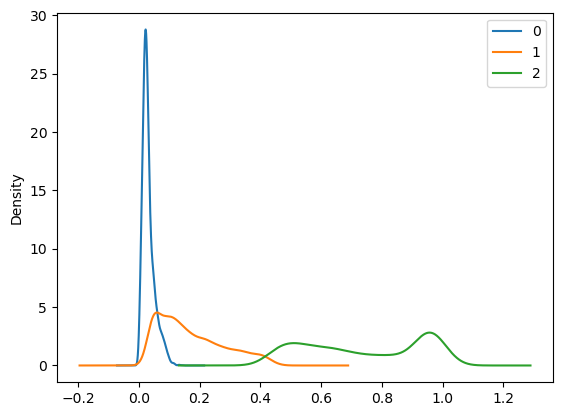

In [65]:
for col in cols_to_keep[-3:]:
    dist_by_clusters(filtered_data, col)

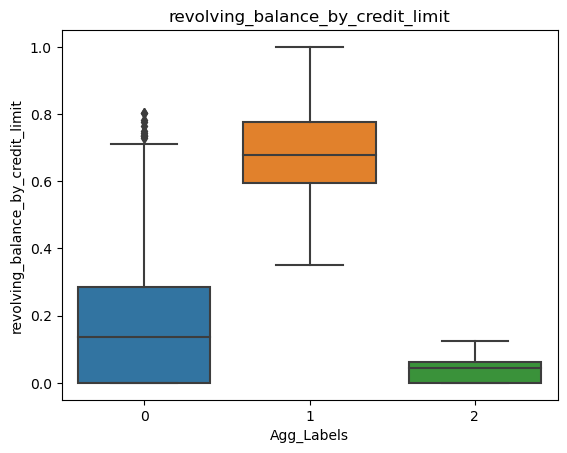

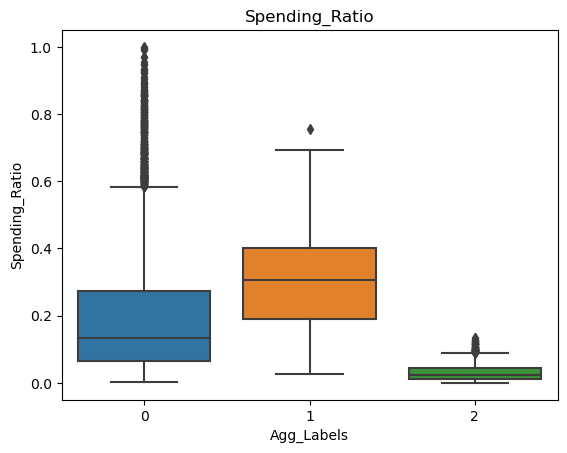

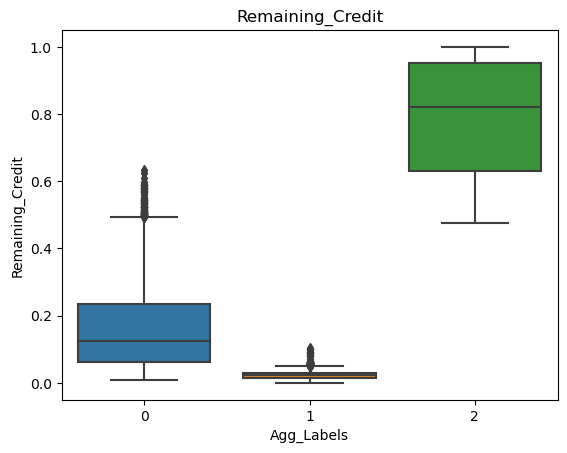

In [66]:
for col in cols_to_keep[-3:]:
    sns.boxplot(x =filtered_data['Agg_Labels'],y= filtered_data[col]);
    plt.title(col);
    plt.show();

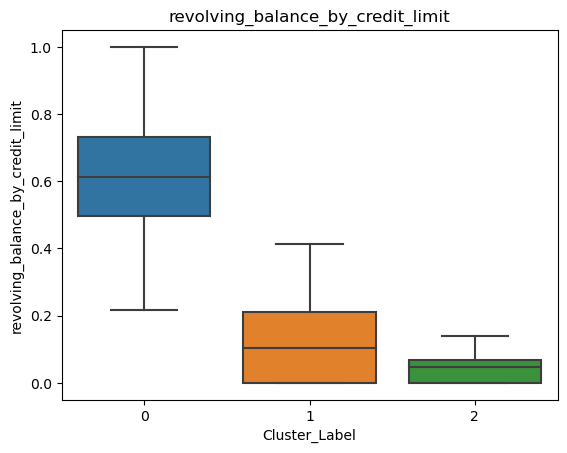

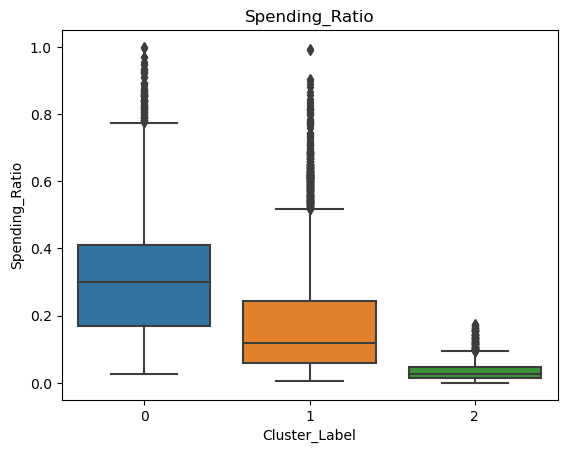

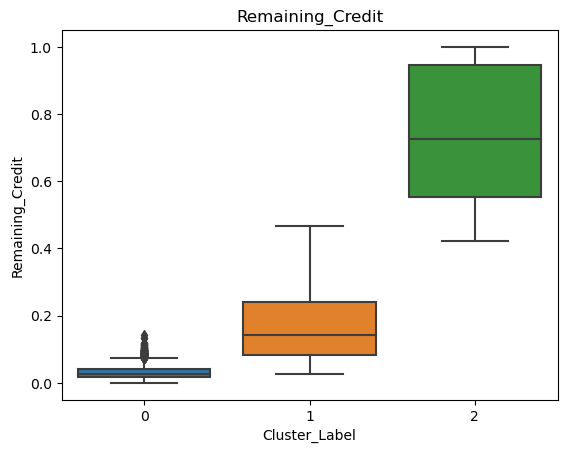

In [67]:
for col in cols_to_keep[-3:]:
    sns.boxplot(x =filtered_data['Cluster_Label'],y= filtered_data[col]);
    plt.title(col);
    plt.show();

In [68]:
filtered_data[cols_to_keep[-3:] + ['Cluster_Label']].groupby(['Cluster_Label']).mean()

,revolving_balance_by_credit_limit,Spending_Ratio,Remaining_Credit
Cluster_Label,,,
0,0.618906,0.319330,0.031564
1,0.117687,0.177295,0.169929
2,0.044101,0.036409,0.738300


In [69]:
filtered_data.head()

,Customer_Age_bins,Gender,Education_Level,Marital_Status,Income_Category,revolving_balance_by_credit_limit,Spending_Ratio,Remaining_Credit,Cluster_Label,Agg_Labels
0,40 to 50,M,High School,Married,$60K - $80K,0.061300,0.014231,0.345116,1,0
1,40 to 50,F,Graduate,Single,Less than $40K,0.104780,0.027314,0.214093,1,0
2,50 to 60,M,Graduate,Married,$80K - $120K,0.000000,0.105484,0.098948,1,0
3,25 to 40,F,High School,Unknown,Less than $40K,0.760672,0.066247,0.022977,0,1
4,25 to 40,M,Uneducated,Married,$60K - $80K,0.000000,0.030604,0.136557,1,0


### Using Categorical Features for further Clustering

In [70]:
filtered_data.groupby(['Customer_Age_bins', 'Income_Category']).agg({'Cluster_Label' : 'count'})

Cluster_Label
Customer_Age_bins Income_Category               
25 to 40          $120K +                    126
                  $40K - $60K                457
                  $60K - $80K                327
                  $80K - $120K               330
                  Less than $40K             881
                  Unknown                    276
40 to 50          $120K +                    312
                  $40K - $60K                821
                  $60K - $80K                710
                  $80K - $120K               736
                  Less than $40K            1573
                  Unknown                    500
50 to 60          $120K +                    285
                  $40K - $60K                415
                  $60K - $80K                314
                  $80K - $120K               450
                  Less than $40K             936
                  Unknown                    273
60+               $120K +                      4
                  $40K - $60K                 97
                  $60K - $80K                 51
                  $80K - $120K                19
                  Less than $40K             171
                  Unknown                     63

In [71]:
filtered_data.head(1)

,Customer_Age_bins,Gender,Education_Level,Marital_Status,Income_Category,revolving_balance_by_credit_limit,Spending_Ratio,Remaining_Credit,Cluster_Label,Agg_Labels
0,40 to 50,M,High School,Married,$60K - $80K,0.0613,0.014231,0.345116,1,0


In [72]:
new_cluster = []
for idx, i in enumerate(filtered_data['Cluster_Label']):
    ### Cluster 0 and Age 25 to 40
    if filtered_data['Customer_Age_bins'][idx] == '25 to 40' and filtered_data['Income_Category'][idx] in (['Unknown','Less than $40K', '$40K - $60K']) and i == 0:
        new_cluster.append('Young, Low Income, High Credit Utilization Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] == '25 to 40' and filtered_data['Income_Category'][idx] in (['$60K - $80K', '$80K - $120K']) and i == 0:
        new_cluster.append('Young, Good Income, High Credit Utilization Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] == '25 to 40' and filtered_data['Income_Category'][idx] in (['$120K +']) and i == 0:
        new_cluster.append('Young, High Income, High Credit Utilization Customers')
        
    ### Cluster 0 and Age 40 to 50 and 50 to 60
    elif filtered_data['Customer_Age_bins'][idx] in ('40 to 50', '50 to 60') and filtered_data['Income_Category'][idx] in (['Unknown','Less than $40K', '$40K - $60K']) and i == 0:
        new_cluster.append('Mid Age, Low Income, High Credit Utilization Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('40 to 50', '50 to 60') and filtered_data['Income_Category'][idx] in (['$60K - $80K', '$80K - $120K']) and i == 0:
        new_cluster.append('Mid Age, Good Income, High Credit Utilization Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('40 to 50', '50 to 60') and filtered_data['Income_Category'][idx] in (['$120K +']) and i == 0:
        new_cluster.append('Mid Age, High Income, High Credit Utilization Customers')
        
    ### Cluster 0 and Age 60+
    elif filtered_data['Customer_Age_bins'][idx] in ('60+') and filtered_data['Income_Category'][idx] in (['Unknown','Less than $40K', '$40K - $60K']) and i == 0:
        new_cluster.append('Old Age, Low Income, High Credit Utilization Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('60+') and filtered_data['Income_Category'][idx] in (['$60K - $80K', '$80K - $120K']) and i == 0:
        new_cluster.append('Old Age, Good Income, High Credit Utilization Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('60+') and filtered_data['Income_Category'][idx] in (['$120K +']) and i == 0:
        new_cluster.append('Old Age, High Income, High Credit Utilization Customers')
        
        
        
        
        
    ### Cluster 1 and Age 25 to 40
    elif filtered_data['Customer_Age_bins'][idx] == '25 to 40' and filtered_data['Income_Category'][idx] in (['Unknown','Less than $40K', '$40K - $60K']) and i == 1:
        new_cluster.append('Young, Low Income, Balanced Usage Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] == '25 to 40' and filtered_data['Income_Category'][idx] in (['$60K - $80K', '$80K - $120K']) and i == 1:
        new_cluster.append('Young, Good Income, Balanced Usage Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] == '25 to 40' and filtered_data['Income_Category'][idx] in (['$120K +']) and i == 1:
        new_cluster.append('Young, High Income, Balanced Usage Customers')
        
    ### Cluster 1 and Age 40 to 50 and 50 to 60
    elif filtered_data['Customer_Age_bins'][idx] in ('40 to 50', '50 to 60') and filtered_data['Income_Category'][idx] in (['Unknown','Less than $40K', '$40K - $60K']) and i == 1:
        new_cluster.append('Mid Age, Low Income, Balanced Usage Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('40 to 50', '50 to 60') and filtered_data['Income_Category'][idx] in (['$60K - $80K', '$80K - $120K']) and i == 1:
        new_cluster.append('Mid Age, Good Income, Balanced Usage Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('40 to 50', '50 to 60') and filtered_data['Income_Category'][idx] in (['$120K +']) and i == 1:
        new_cluster.append('Mid Age, High Income, Balanced Usage Customers')
        
    ### Cluster 1 and Age 60+
    elif filtered_data['Customer_Age_bins'][idx] in ('60+') and filtered_data['Income_Category'][idx] in (['Unknown','Less than $40K', '$40K - $60K']) and i == 1:
        new_cluster.append('Old Age, Low Income, Balanced Usage Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('60+') and filtered_data['Income_Category'][idx] in (['$60K - $80K', '$80K - $120K']) and i == 1:
        new_cluster.append('Old Age, Good Income, Balanced Usage Customers')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('60+') and filtered_data['Income_Category'][idx] in (['$120K +']) and i == 1:
        new_cluster.append('Old Age, High Income, Balanced Usage Customers')
        
        
            
        
        
        
        
    ### Cluster 2 and Age 25 to 40
    elif filtered_data['Customer_Age_bins'][idx] == '25 to 40' and filtered_data['Income_Category'][idx] in (['Unknown','Less than $40K', '$40K - $60K']) and i == 2:
        new_cluster.append('Young, Low Income, Conservative Users')
        
    elif filtered_data['Customer_Age_bins'][idx] == '25 to 40' and filtered_data['Income_Category'][idx] in (['$60K - $80K', '$80K - $120K']) and i == 2:
        new_cluster.append('Young, Good Income, Conservative Users')
        
    elif filtered_data['Customer_Age_bins'][idx] == '25 to 40' and filtered_data['Income_Category'][idx] in (['$120K +']) and i == 2:
        new_cluster.append('Young, High Income, Conservative Users')
        
    ### Cluster 2 and Age 40 to 50 and 50 to 60
    elif filtered_data['Customer_Age_bins'][idx] in ('40 to 50', '50 to 60') and filtered_data['Income_Category'][idx] in (['Unknown','Less than $40K', '$40K - $60K']) and i == 2:
        new_cluster.append('Mid Age, Low Income, Conservative Users')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('40 to 50', '50 to 60') and filtered_data['Income_Category'][idx] in (['$60K - $80K', '$80K - $120K']) and i == 2:
        new_cluster.append('Mid Age, Good Income, Conservative Users')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('40 to 50', '50 to 60') and filtered_data['Income_Category'][idx] in (['$120K +']) and i == 2:
        new_cluster.append('Mid Age, High Income, Conservative Users')
        
    ### Cluster 2 and Age 60+
    elif filtered_data['Customer_Age_bins'][idx] in ('60+') and filtered_data['Income_Category'][idx] in (['Unknown','Less than $40K', '$40K - $60K']) and i == 2:
        new_cluster.append('Old Age, Low Income, Conservative Users')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('60+') and filtered_data['Income_Category'][idx] in (['$60K - $80K', '$80K - $120K']) and i == 2:
        new_cluster.append('Old Age, Good Income, Conservative Users')
        
    elif filtered_data['Customer_Age_bins'][idx] in ('60+') and filtered_data['Income_Category'][idx] in (['$120K +']) and i == 2:
        new_cluster.append('Old Age, High Income, Conservative Users')  

In [73]:
filtered_data['New_Clusters'] = new_cluster

In [74]:
filtered_data['New_Clusters'].value_counts()

New_Clusters
Mid Age, Low Income, Balanced Usage Customers              2341
Mid Age, Low Income, High Credit Utilization Customers     1976
Mid Age, Good Income, Balanced Usage Customers             1093
Young, Low Income, Balanced Usage Customers                 812
Mid Age, Good Income, Conservative Users                    754
Young, Low Income, High Credit Utilization Customers        730
Mid Age, Good Income, High Credit Utilization Customers     363
Mid Age, High Income, Conservative Users                    335
Young, Good Income, Balanced Usage Customers                322
Young, Good Income, Conservative Users                      204
Mid Age, High Income, Balanced Usage Customers              203
Mid Age, Low Income, Conservative Users                     201
Old Age, Low Income, Balanced Usage Customers               177
Old Age, Low Income, High Credit Utilization Customers      140
Young, Good Income, High Credit Utilization Customers       131
Young, Low Income, Conserva

In [75]:
import pickle
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans_model, file)